Problem statement:
-To predict the rating of electronic products based on their reviews

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset

df=pd.read_excel("ratingdata.xlsx")
df

,Unnamed: 0,Review,Rating
0,0,Only mobile phone and both side x tupe cable r...,1.0
1,1,Better to provide all basic accessories with ...,2.0
2,2,Don't buy this product not worthy for 16k.,3.0
3,3,back cover is brittle. got a crack,1.0
4,4,"With 5G connectivity, a 120Hz display and soli...",5.0
...,...,...,...
20331,20331,Nice 👍👍👍,5
20332,20332,Good,4
20333,20333,Very worst product ever purchased on flipkart....,5
20334,20334,Very bad quality speaker I purchase from Flipk...,5


- So the dataset has 20336 rows of data and 3 columns out of which Unnamed column is same as the index of the rows, So we should remove it from the dataset

**Data Analysis and Cleaning:**

In [3]:
df.info()  #checking the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20336 entries, 0 to 20335
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20336 non-null  int64 
 1   Review      19910 non-null  object
 2   Rating      20336 non-null  object
dtypes: int64(1), object(2)
memory usage: 476.8+ KB


- firstly I am going to remove the unnamed column from the dataset
- secondly, we can see the review varibale has some null values present
- also the ratings variable is of object datatype when it should be of float datatype

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)  #removing the unnamed column
df.sample() 

,Review,Rating
7575,"On first look, I though how would it fit in th...",5.0


In [5]:
#now let's check out for duplicate data that might be present in the dataset

dfdup=df[df.duplicated()]
dfdup

,Review,Rating
1469,Good,1.0
1487,Ok,1.0
1497,Good,1.0
1500,Good,5.0
1583,Good,5.0
...,...,...
20325,Good,5
20326,Value for money,5
20331,Nice 👍👍👍,5
20332,Good,4


- So, the dataset has 3435 duplicated rows of data. Though duplicacy can result in overfitting but since this real data there might be a possibility that maybe some customers have similar opinion, So i am not going to remove these duplicated values 

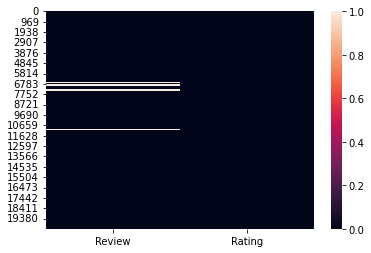

Review    426
Rating      0
dtype: int64

In [6]:
#plotting a heatmap for missing values
sns.heatmap(df.isnull())
plt.show()
df.isnull().sum()

- we are going to replace these null values with no reviews


In [7]:
# Replacing missing data using pandas fillna()
df['Review'].fillna('No review',inplace=True)

In [8]:
df.isnull().sum()  #Checking after filling them

Review    0
Rating    0
dtype: int64

- The missing values have been replaced

Now let's check out the target variable

In [9]:
df['Rating'].value_counts()

5            6295
5.0          3876
1.0          3123
4.0          2066
4            2049
3.0          1332
2.0           890
3             677
No rating      28
Name: Rating, dtype: int64

- okay so we are going to replace the duplicated rating form

In [10]:
df['Rating'].replace('5','5.0',inplace=True)    #replacing the values
df['Rating'].replace('4','4.0',inplace=True)
df['Rating'].replace('3','3.0',inplace=True)
df['Rating'].value_counts()

5.0          10171
4.0           4115
1.0           3123
3.0           2009
2.0            890
No rating       28
Name: Rating, dtype: int64

- the Rating variable has some values as No ratings and as only 28 No rating values are present I am going to drop them from the dataset

In [11]:
df.drop(df.index[df['Rating'] == 'No rating'].tolist(),inplace=True)  #dropping the No rating rows

In [12]:
df['Rating'].dtype  #checking the dtype

dtype('O')

In [13]:
#converting the datatype of the target variable using pandas to_numeric
df['Rating'] = pd.to_numeric(df['Rating'])

df.dtypes   #checking for dtype

Review     object
Rating    float64
dtype: object

In [14]:
df['Rating'].value_counts()

5.0    10171
4.0     4115
1.0     3123
3.0     2009
2.0      890
Name: Rating, dtype: int64

In [15]:
df.describe()   #futher looking into data

,Rating
count,20308.000000
mean,3.852915
std,1.462043
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


- it can be seen that the mean of the rating data is 3.85 

**Visualizing the target variable - Rating**

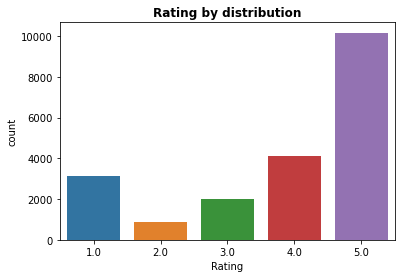

5.0    10171
4.0     4115
1.0     3123
3.0     2009
2.0      890
Name: Rating, dtype: int64

In [193]:
#plotting a count plot of the rating
sns.countplot('Rating',data=df)
plt.title('Rating by distribution',fontweight ='bold')
plt.show()
df['Rating'].value_counts()

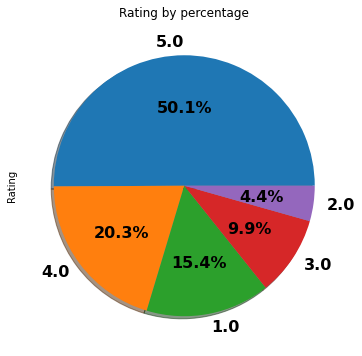

In [194]:
#plotting a pie chart for the ratings
plt.figure(figsize=(12,6))
df['Rating'].value_counts().plot.pie(autopct='%2.1f%%',
                                     textprops ={'fontsize':16 ,'fontweight' :'bold'},
                                     shadow=True)
plt.title('Rating by percentage')
plt.show()

- More than 50% customers gave 5 start rtaing
- only 4.4% customers have given 2 star rating

In [195]:
# Average Rating given by user
print("Average rating is " + str(round(df['Rating'].mean(),2)))

Average rating is 3.85


**NLP PREPROCESSING**

- Removing inverted commas and other special characters
- Removing punctuations
- Removing stopwords
- Lemmatizing 
- Converting into vectors

In [16]:
df['Review']

0        Only mobile phone and both side x tupe cable r...
1         Better to provide all basic accessories with ...
2               Don't buy this product not worthy for 16k.
3                       back cover is brittle. got a crack
4        With 5G connectivity, a 120Hz display and soli...
                               ...                        
20331                                             Nice 👍👍👍
20332                                                 Good
20333    Very worst product ever purchased on flipkart....
20334    Very bad quality speaker I purchase from Flipk...
20335                                                  Bad
Name: Review, Length: 20308, dtype: object

In [17]:
import re            #importing reg

def deconstructed(phrase):
    #specific
    phrase = re.sub(r"’","'",str(phrase))
    phrase = re.sub(r"“",'"',str(phrase))
    phrase = re.sub(r"”",'"',str(phrase))
    phrase = re.sub(r"won't","will not",str(phrase))
    phrase = re.sub(r"can't","can not",str(phrase))
    
    #general
    phrase = re.sub(r"'t"," not",str(phrase))
    phrase = re.sub(r"'re"," are",str(phrase))
    phrase = re.sub(r"'s","s",str(phrase))
    phrase = re.sub(r"'d", "would",str(phrase))
    phrase = re.sub(r"'ll"," will",str(phrase))
    phrase = re.sub(r"'ve"," have",str(phrase))
    phrase = re.sub(r"'m"," am",str(phrase))
    return phrase

In [18]:
import re                           #importing regex
from nltk.corpus import stopwords    #importing stopwords
from nltk.stem import WordNetLemmatizer   #importing lemmatizer
stop_words = stopwords.words('english')    #assigning stopwords
lemmatizer = WordNetLemmatizer()           #assigning lemmatizer

In [19]:
from tqdm import tqdm            #for progress check
preprocessed_review = []          
for sentence in tqdm(df['Review'].values):
    sent = deconstructed(sentence)
    sent = re.sub(r'https?:\/\/.*[\r\n]*','webaddress',sent)    #replacing urls with webaddress
    sent = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress',sent)   #replacing emailaddress
    sent = re.sub(r'\d+(\.\d+)?', 'numbr',sent)     #replacing numbrs  
    sent = re.sub('[^A-Za-z]+'," ",sent)         #removing everything except english language
    sent = ' '.join(e for e in sent.split() if e not in stop_words)   #removing stopwords
    sent = ' '.join(lemmatizer.lemmatize(e) for e in sent.split())  #stemming
    preprocessed_review.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 20308/20308 [00:09<00:00, 2248.46it/s]


In [20]:
df['Clean_Review'] = preprocessed_review  #creating a new column for clean texts

In [21]:
df.head()

,Review,Rating,Clean_Review
0,Only mobile phone and both side x tupe cable r...,1.0,only mobile phone side x tupe cable recived ea...
1,Better to provide all basic accessories with ...,2.0,better provide basic accessory product
2,Don't buy this product not worthy for 16k.,3.0,don buy product worthy numbrk
3,back cover is brittle. got a crack,1.0,back cover brittle got crack
4,"With 5G connectivity, a 120Hz display and soli...",5.0,with numbrg connectivity numbrhz display solid...


**NOW PLOTTING WORDCLOUD FOR DIFFERENT RATING VALUES**

- The enlarged texts will be the most number of words used and small texts will be the less number of words used

In [22]:
from wordcloud import WordCloud

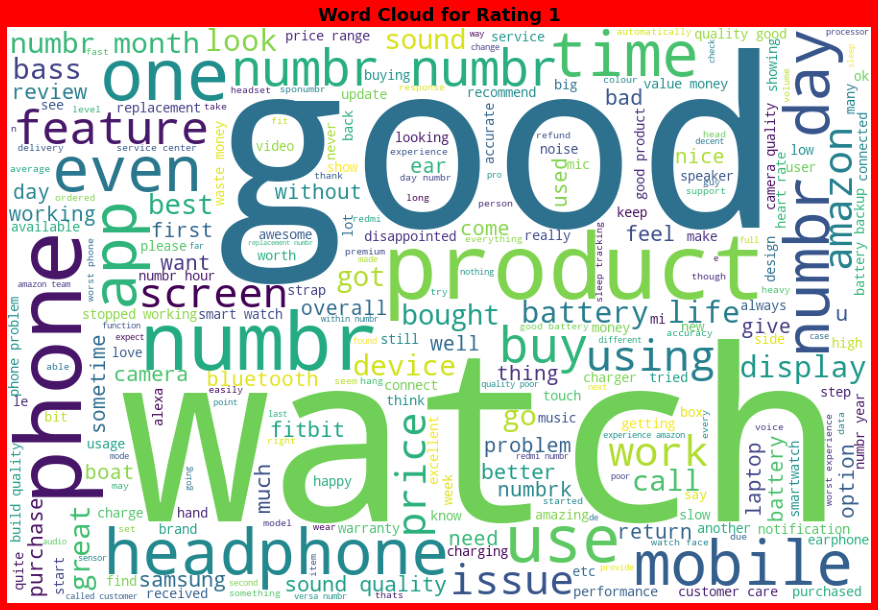

In [219]:
#Getting sense of words in Rating 1
one = df['Clean_Review'][df['Rating']==1.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 1',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

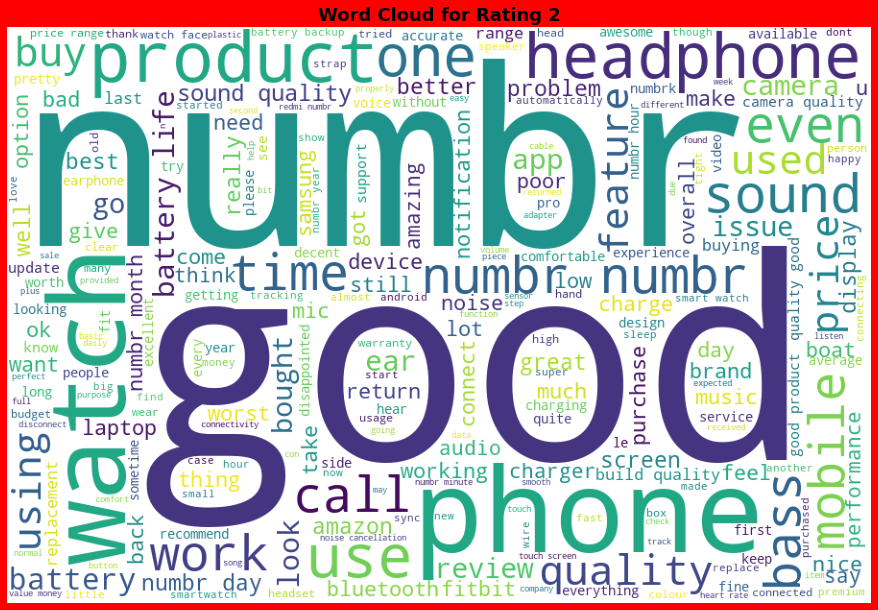

In [223]:
#Getting sense of words in Rating 2
one = df['Clean_Review'][df['Rating']==2.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 2',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

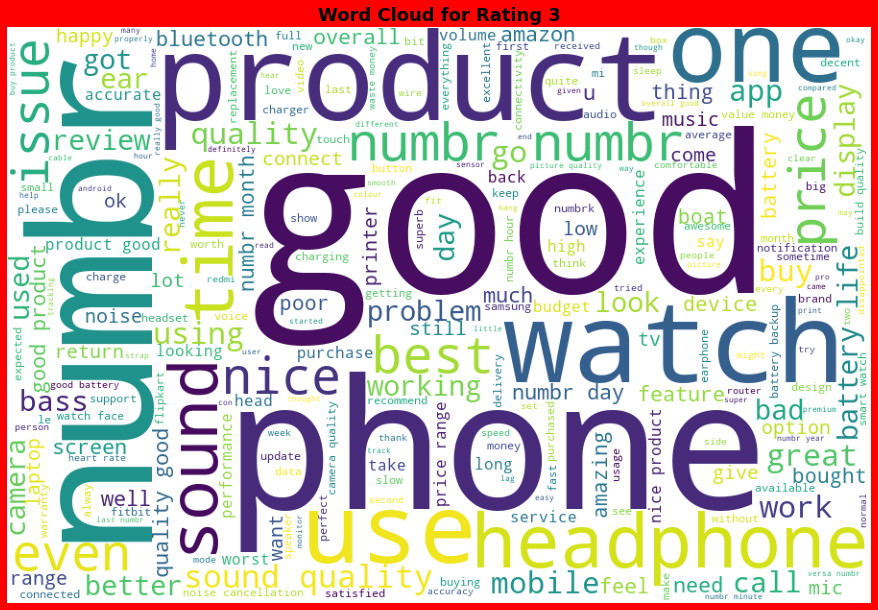

In [224]:
#Getting sense of words in Rating 3
one = df['Clean_Review'][df['Rating']==3.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 3',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

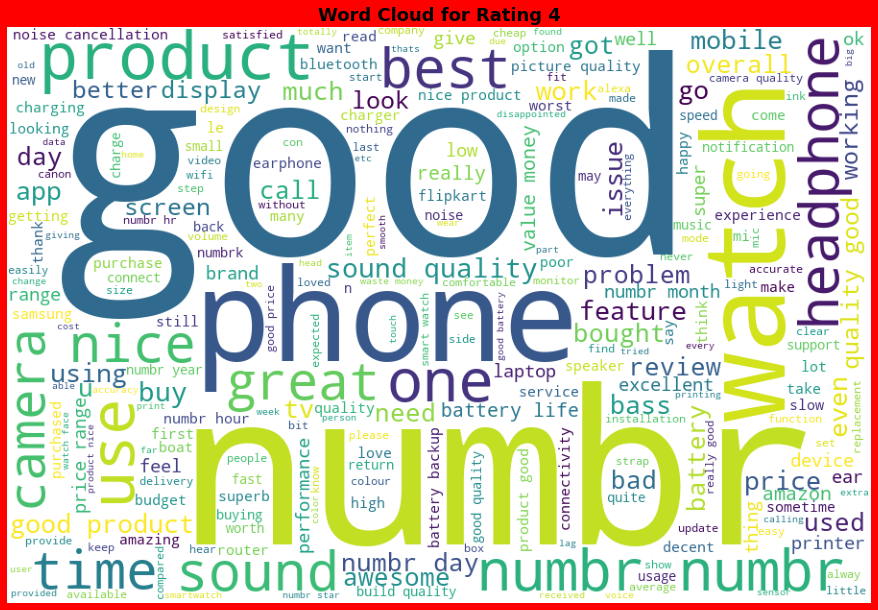

In [225]:
#Getting sense of words in Rating 4
one = df['Clean_Review'][df['Rating']==4.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 4',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

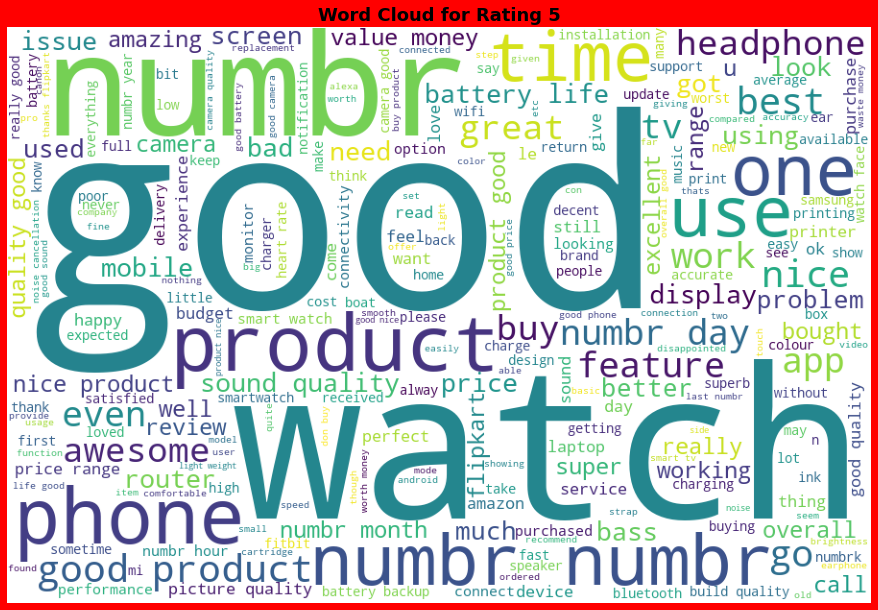

In [226]:
#Getting sense of words in Rating 5
one = df['Clean_Review'][df['Rating']==5.0]
one_cloud = WordCloud(width=900,height=600,background_color='white',max_words=250).generate(' '.join(one))
plt.figure(figsize=(12,9),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for Rating 5',fontsize=18,fontweight ='bold')
plt.tight_layout(pad=0)
plt.show()

**Vectorization**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [117]:
# Converting text into numeric using TfidfVectorizer
tf = TfidfVectorizer(min_df=10)
features = tf.fit_transform(df['Clean_Review'])
x=features
y=df['Rating']

In [118]:
x.shape , y.shape

((20308, 2927), (20308,))

# Building Models

In [67]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

1. Logistic Regression

In [69]:
lr=LogisticRegression()

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=.30)   
lr.fit(x_train,y_train) 
predtrain=lr.predict(x_train)
predlr=lr.predict(x_test)
    
print('Training accuracy score is',accuracy_score(y_train,predtrain)*100)
print('Testing accuracy score is',accuracy_score(y_test,predlr)*100,'\n')

Training accuracy score is 57.34787196623286
Testing accuracy score is 50.18874117840144 



In [70]:
print('Confusion matrix of Logistics Regression :','\n',confusion_matrix(y_test, predlr))
print('\n')
print('Classification Report of Logistics Regression:','\n',classification_report(y_test, predlr))

Confusion matrix of Logistics Regression : 
 [[ 227    1   16   54  613]
 [  81    7    6   19  170]
 [  85    1   12   30  483]
 [ 109    1    7   78 1024]
 [ 239    0    7   89 2734]]


Classification Report of Logistics Regression: 
               precision    recall  f1-score   support

         1.0       0.31      0.25      0.27       911
         2.0       0.70      0.02      0.05       283
         3.0       0.25      0.02      0.04       611
         4.0       0.29      0.06      0.10      1219
         5.0       0.54      0.89      0.68      3069

    accuracy                           0.50      6093
   macro avg       0.42      0.25      0.23      6093
weighted avg       0.44      0.50      0.41      6093



In [72]:
#cross validation for logistic Regression
lr_scores = cross_val_score(lr, x, y, cv=10)
print("Scores:", lr_scores,'\n')
print("Mean:", lr_scores.mean(),'\n')
print("Standard Deviation:", lr_scores.std())

Scores: [0.29000492 0.30182176 0.2530773  0.23387494 0.47119645 0.50566224
 0.49827671 0.47858198 0.4955665  0.49359606] 

Mean: 0.40216588688141686 

Standard Deviation: 0.10992490573008372


2. Decision Tree Classifier

In [73]:
dtc=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=.30)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc)*100)

43.73871655998687


In [74]:
print('Confusion matrix of Decision Tree Classfier :','\n',confusion_matrix(y_test, preddtc))
print('\n')
print('Classification Report of Decision Tree Classifier :','\n',classification_report(y_test, preddtc))

Confusion matrix of Decision Tree Classfier : 
 [[ 237   46   74  143  411]
 [  69   19   31   39  125]
 [ 111   22   54   82  342]
 [ 131   30   98  229  731]
 [ 292   51  177  423 2126]]


Classification Report of Decision Tree Classifier : 
               precision    recall  f1-score   support

         1.0       0.28      0.26      0.27       911
         2.0       0.11      0.07      0.08       283
         3.0       0.12      0.09      0.10       611
         4.0       0.25      0.19      0.21      1219
         5.0       0.57      0.69      0.62      3069

    accuracy                           0.44      6093
   macro avg       0.27      0.26      0.26      6093
weighted avg       0.40      0.44      0.41      6093



In [75]:
#cross validation for Decision Tree classifier
dtc_scores = cross_val_score(dtc, x, y, cv=5)
print("Scores:", dtc_scores,'\n')
print("Mean:", dtc_scores.mean(),'\n')
print("Standard Deviation:", dtc_scores.std())

Scores: [0.26366322 0.15928114 0.35302806 0.35409998 0.4092588 ] 

Mean: 0.30786624120032624 

Standard Deviation: 0.08773715157832206


3. KNeighbors Classifier

In [105]:
knn=KNeighborsClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=.30)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn)*100)

36.84556047923847


In [106]:
print('Confusion matrix of KNeighbors Classfier :','\n',confusion_matrix(y_test, predknn))
print('\n')
print('Classification Report of KNeighbors Classifier :','\n',classification_report(y_test, predknn))

Confusion matrix of KNeighbors Classfier : 
 [[ 293   51   52  180  335]
 [  76   15   24   71   97]
 [ 159   22   53  101  276]
 [ 256   36  110  240  577]
 [ 579   87  225  534 1644]]


Classification Report of KNeighbors Classifier : 
               precision    recall  f1-score   support

         1.0       0.21      0.32      0.26       911
         2.0       0.07      0.05      0.06       283
         3.0       0.11      0.09      0.10       611
         4.0       0.21      0.20      0.20      1219
         5.0       0.56      0.54      0.55      3069

    accuracy                           0.37      6093
   macro avg       0.23      0.24      0.23      6093
weighted avg       0.37      0.37      0.37      6093



In [107]:
#cross validation for KNeighbors
knn_scores = cross_val_score(knn, x, y, cv=5)
print("Scores:", knn_scores,'\n')
print("Mean:", knn_scores.mean(),'\n')
print("Standard Deviation:", knn_scores.std())

Scores: [0.28458887 0.18439193 0.32077794 0.3669047  0.37798572] 

Mean: 0.3069298321231452 

Standard Deviation: 0.06978875457370741


4. MultinomialNB

In [79]:
mnb=MultinomialNB()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=.30)
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb)*100)

51.288363696044634


In [81]:
print('Confusion matrix of MultinoimalNB :','\n',confusion_matrix(y_test, predmnb))
print('\n')
print('Classification Report of MultinomialNB :','\n',classification_report(y_test, predmnb))

Confusion matrix of MultinoimalNB : 
 [[ 188    0    3   23  697]
 [  59    6    2   11  205]
 [  54    0    5   14  538]
 [  83    0    0   48 1088]
 [ 162    0    4   25 2878]]


Classification Report of MultinomialNB : 
               precision    recall  f1-score   support

         1.0       0.34      0.21      0.26       911
         2.0       1.00      0.02      0.04       283
         3.0       0.36      0.01      0.02       611
         4.0       0.40      0.04      0.07      1219
         5.0       0.53      0.94      0.68      3069

    accuracy                           0.51      6093
   macro avg       0.53      0.24      0.21      6093
weighted avg       0.48      0.51      0.40      6093



In [82]:
#cross validation for MultinomialNB
mnb_scores = cross_val_score(mnb, x, y, cv=10)
print("Scores:", mnb_scores,'\n')
print("Mean:", mnb_scores.mean(),'\n')
print("Standard Deviation:", mnb_scores.std())

Scores: [0.39537174 0.35647464 0.28015756 0.24667651 0.50812408 0.51354013
 0.51058592 0.47858198 0.51477833 0.51330049] 

Mean: 0.43175913731254223 

Standard Deviation: 0.09934654838531791


5. Ada Boost Classifier

In [83]:
#AdaBoost

ada=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=.30)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(accuracy_score(y_test,predada)*100)

50.66469719350074


In [84]:
print('Confusion matrix of Ada Boost Classifer :','\n',confusion_matrix(y_test, predada))
print('\n')
print('Classification Report of Ada Boost Classifier :','\n',classification_report(y_test, predada))

Confusion matrix of Ada Boost Classifer : 
 [[ 103    9    7    7  785]
 [  19   12   11    2  239]
 [  28    6    7    3  567]
 [  39   10   15    9 1146]
 [  80   13    9   11 2956]]


Classification Report of Ada Boost Classifier : 
               precision    recall  f1-score   support

         1.0       0.38      0.11      0.17       911
         2.0       0.24      0.04      0.07       283
         3.0       0.14      0.01      0.02       611
         4.0       0.28      0.01      0.01      1219
         5.0       0.52      0.96      0.67      3069

    accuracy                           0.51      6093
   macro avg       0.31      0.23      0.19      6093
weighted avg       0.40      0.51      0.37      6093



In [85]:
#cross validation for Ada Boost Classifier
ada_scores = cross_val_score(ada, x, y, cv=5)
print("Scores:", ada_scores,'\n')
print("Mean:", ada_scores.mean(),'\n')
print("Standard Deviation:", ada_scores.std())

Scores: [0.34958149 0.23855244 0.43894633 0.45604531 0.50209308] 

Mean: 0.39704372911814667 

Standard Deviation: 0.09342861961683958


6. Gradient Boosting Classifier

In [87]:
#Gradient Boosting

gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=.30)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb)*100)

50.99294272115542


In [88]:
print('Confusion matrix of Gradient Boosting Classifier :','\n',confusion_matrix(y_test, predgb))
print('\n')
print('Classification Report of Gradient Boosting Classifier :','\n',classification_report(y_test, predgb))

Confusion matrix of Gradient Boosting Classifier : 
 [[ 120    5   14   17  755]
 [  27   10    6    6  234]
 [  32    4   14    8  553]
 [  41    6   11   39 1122]
 [  98    7   14   26 2924]]


Classification Report of Gradient Boosting Classifier : 
               precision    recall  f1-score   support

         1.0       0.38      0.13      0.20       911
         2.0       0.31      0.04      0.06       283
         3.0       0.24      0.02      0.04       611
         4.0       0.41      0.03      0.06      1219
         5.0       0.52      0.95      0.68      3069

    accuracy                           0.51      6093
   macro avg       0.37      0.23      0.21      6093
weighted avg       0.44      0.51      0.39      6093



In [89]:
#cross validation for Gradient Boosting Classifier
gb_scores = cross_val_score(gb, x, y, cv=5)
print("Scores:", gb_scores,'\n')
print("Mean:", gb_scores.mean(),'\n')
print("Standard Deviation:", gb_scores.std())

Scores: [0.36189069 0.21959626 0.45544067 0.42280227 0.49741443] 

Mean: 0.391428863451275 

Standard Deviation: 0.09665783954037536


7. Random Forest Classifier

In [90]:
#RandomForest

rf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=.30)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)

50.02461841457411


In [91]:
print('Confusion matrix of Random Forest Classifier :','\n',confusion_matrix(y_test, predrf))
print('\n')
print('Classification Report of Random Forest Classifier :','\n',classification_report(y_test, predrf))

Confusion matrix of Random Forest Classifier : 
 [[ 128    4    7   20  752]
 [  29    6    2    7  239]
 [  30    1   13   22  545]
 [  48    2   12   53 1104]
 [ 115    6   15   85 2848]]


Classification Report of Random Forest Classifier : 
               precision    recall  f1-score   support

         1.0       0.37      0.14      0.20       911
         2.0       0.32      0.02      0.04       283
         3.0       0.27      0.02      0.04       611
         4.0       0.28      0.04      0.08      1219
         5.0       0.52      0.93      0.67      3069

    accuracy                           0.50      6093
   macro avg       0.35      0.23      0.20      6093
weighted avg       0.41      0.50      0.39      6093



In [92]:
#cross validation for Random Forest Classifier
rf_scores = cross_val_score(rf, x, y, cv=5)
print("Scores:", rf_scores,'\n')
print("Mean:", rf_scores.mean(),'\n')
print("Standard Deviation:", rf_scores.std())

Scores: [0.30649926 0.18463811 0.40177253 0.42378724 0.49051958] 

Mean: 0.3614433435165426 

Standard Deviation: 0.10625706738795285


**Best Model?**

In [96]:

    by='Accuracy Score',

SyntaxError: illegal target for annotation (Temp/ipykernel_2136/546813789.py, line 1)

In [109]:
results = pd.DataFrame({'Accuracy Score':[round(accuracy_score(y_test,predlr)*100,2),round(accuracy_score(y_test,predknn)*100,2),round(accuracy_score(y_test,preddtc)*100,2),round(accuracy_score(y_test,predada)*100,2),round(accuracy_score(y_test,predgb)*100,2),round(accuracy_score(y_test,predrf)*100,2),round(accuracy_score(y_test,predmnb)*100,2)],'Cross Validation':[round(lr_scores.mean()*100,2),round(knn_scores.mean()*100,2),round(dtc_scores.mean()*100,2),round(ada_scores.mean()*100,2),round(gb_scores.mean()*100,2),round(rf_scores.mean()*100,2),round(mnb_scores.mean()*100,2)]},index=['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','AdaBoostClassifier','GradientBoostingClassifier','RandomForestClassifier','MultiNomialNB'])
result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df

,Accuracy Score,Cross Validation
MultiNomialNB,51.29,43.18
GradientBoostingClassifier,50.99,39.14
AdaBoostClassifier,50.66,39.70
LogisticRegression,50.19,40.22
RandomForestClassifier,50.02,36.14
DecisionTreeClassifier,43.74,30.79
KNeighborsClassifier,36.85,30.69


- We are going to select logistic regression as our final model because of good recall for all the labels and good cross validation score as well

## Hyperparameter Tuning

In [113]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV              #importing HalvingGridSearch

In [ ]:
lr=LogisticRegression()
parameter = {'penalty' : ['l2', 'none'],
             'C':[1,3,5],
             'max_iter':[100,150,200],
             'verbose':[1,5,10]
            }
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=.30)
search = HalvingGridSearchCV(lr, parameter, verbose= 10).fit(x_train, y_train)  

In [123]:
search.best_params_

{'C': 1, 'max_iter': 200, 'penalty': 'l2', 'verbose': 10}

In [125]:
Final_mod = LogisticRegression(C=1,max_iter=200,penalty='l2',verbose=10)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.33)
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\033[1m'+'Final Logistic Regression Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred)*100)
print('\n')
print('\033[1m'+'Confusion matrix of Logistic Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Logistic Regression'+'\033[0m \n',classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Final Logistic Regression Model
Accuracy Score :
 50.059683676514474


Confusion matrix of Logistic Regression : 
 [[ 263    2   17   60  707]
 [  67    6    3   21  201]
 [  89    1    5   45  484]
 [ 131    2    4   99 1140]
 [ 236    0    7  130 2982]]


Classification Report of Logistic Regression 
               precision    recall  f1-score   support

         1.0       0.33      0.25      0.29      1049
         2.0       0.55      0.02      0.04       298
         3.0       0.14      0.01      0.02       624
         4.0       0.28      0.07      0.11      1376
         5.0       0.54      0.89      0.67      3355

    accuracy                           0.50      6702
   macro avg       0.37      0.25      0.23      6702
weighted avg       0.42      0.50      0.41      6702



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.4s finished


**Comment:**

- The final model after hyperparameter tuning is giving us more accurate results
- The accuracy is very less for the model
- Low accuracy can be a result of the type of dataset
- One can also resample the data as the label variable has imabalanced distribution of classes

In [129]:
#saving the best model
import pickle

Final_mod = LogisticRegression(C=1,max_iter=200,penalty='l2',verbose=10)
pickle.dump(Final_mod,open('reviw_rating_predication.pkl','wb'))